## Behavioural Finance ##

Assume Barberis, Huang, and Santos economy where investor receives utility from consumption as well as recent financial gain or loss. Use these parameters:

$$
\delta = 0.99 , \gamma  = 1 , \lambda =2
$$
Consumption growth has lognormal distribution:
$$
ln\tilde{g} = 0.02 + 0.02 \tilde{\epsilon}
$$

where $\epsilon$ is standard normal random variable. Simulate probability distribution for consumption growth with (at least) 104 random draws from standard normal distribution.

With these parameters, risk-free rate is around 3% per year:

$$
    R_f = \frac{e^{0.0198}}{0.99} = 1.0303
$$

Define x as one plus dividend yield for market portfolio:

$$
    x = 1 + \frac{D}{P}
$$ 
and define error term:
$$
e(x) = 0.99 b_0 E[v(x\tilde{g})] + 0.99x - 1
$$

where utility from recent financial gain or loss is given by:

Solve for e(x) = 0 to find equilibrium value of x, using bisection search:

1. Set x– = 1 and x+ = 1.1, and use simulated distribution of consumption growth to confirm that e(x–) < 0 and e(x+) > 0 ⇒ solution must lie between x– and x+
2. Set x0 = 0.5*(x– + x+) and use simulated distribution of consumption growth to calculate e(x0)
3. If |e(x0)| < 10–5, then you have converged to solution
4. Otherwise if e(x0) < 0, then solution lies between x0 and x+ ⇒ repeat from step 2 with x– = x0
5. Otherwise if e(x0) > 0, then solution lies between x– and x0 ⇒ repeat from step 2 with x+ = x0

Repeat for b0 in range from 0 to 10, in increments of 0.1 (or less).

* Calculate price-dividend ratio for market portfolio:
$$
\frac{P}{D} = \frac{1}{x-1}
$$ 
 
Plot price-dividend ratio (on vertical axis) vs b0.

* Calculate expected market return:
$$
E[\tilde{R_m}] = E(x\tilde{g}) = xe^{0.0202}
$$
Plot equity premium (on vertical axis) vs b0.

* Briefly explain main characteristics of v(∙) (which is utility function to measure utility from recent financial gain or loss), as well as economic significance of b0 and λ.


In [13]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [14]:
no_of_draws = 100000
my_sigma = 0.99
my_gamma = 1
my_lambda = 2
R_f = np.exp(0.0198) / 0.99

In [15]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([-0.00674826,  1.44152366,  1.02889633, ..., -2.19524196,
        0.20582951,  1.97528056])

In [16]:
g = np.exp(0.02 + 0.02 * epsilon)
g

array([1.02006366, 1.05004233, 1.04141246, ..., 0.97637862, 1.02440975,
       1.06131172])

In [17]:
b_0 = np.arange(0, 10.1, 0.1)
b_0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Define error term
$$e(x) = 0.99b_0E[v(x\tilde{g})]+0.99x -1$$

where 
$$v(R) = r - 1.0303 ; R\geq 1.0303$$
$$v(R) = 2(r - 1.0303) ; R < 1.0303$$
$$ R_f \approx 1.0303$$
solve to minimize e(x)

In [18]:
err_tolerance = 1e-5

In [19]:
def utility(r, R_f):
    if r >= R_f:
        utility = r - R_f
    else:
        utility = 2 * (r - R_f)
    return utility

In [20]:
# should we implement our own bisection search ?
def bisect_x(x_lower, x_upper, b, g):
    x_0 = (x_lower + x_upper) / 2
    expected_utility = np.average([utility(i * x_0, R_f) for i in g])
    expected_return = np.average([i * x_0 for i in g])
    error = 0.99 * b * expected_utility + 0.99 * x_0 - 1
    if np.abs(error) <= err_tolerance:
        return x_0, expected_utility, expected_return
    else:
        if (error > 0) and (np.abs(error) > err_tolerance):
            x_0, expected_utility, expected_return = bisect_x(x_lower, x_0, b, g)
        elif (error < 0) and (np.abs(error) > err_tolerance):
            x_0, expected_utility, expected_return = bisect_x(x_0, x_upper, b, g)

    return x_0, expected_utility, expected_return

In [21]:
possible_x = []
possible_utility = []
possible_return = []
x_lower = 1
x_upper = 1.1
for b in b_0:
    my_x, my_utility, my_return = bisect_x(x_lower, x_upper, b, g)
    possible_x.append(my_x)
    possible_utility.append(my_utility)
    possible_return.append(my_return)

In [22]:
df = pd.DataFrame(
    list(zip(b_0, possible_x, possible_utility, possible_return)),
    columns=("b", "x", "exp_util", "exp_return"),
)
df["pd_ratio"] = 1 / (df["x"] - 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


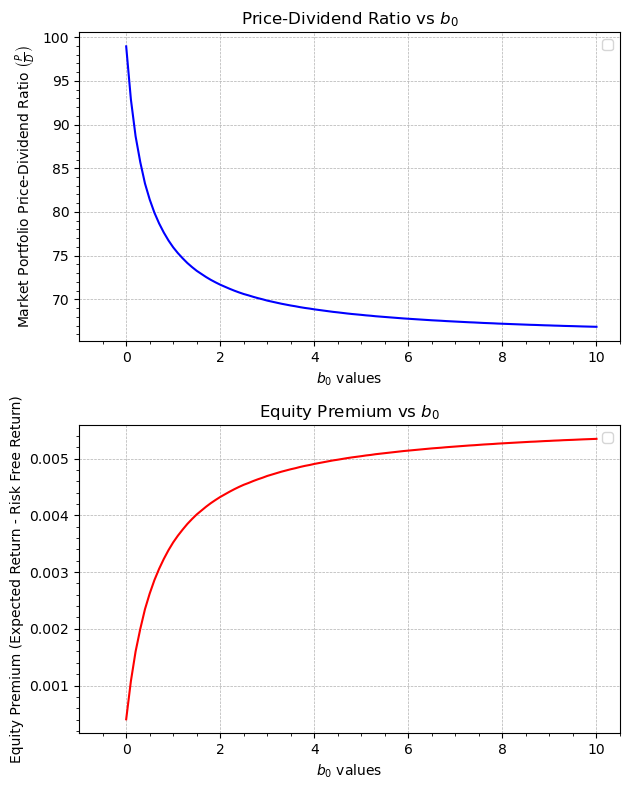

In [23]:
f0, ax0 = plt.subplots(2, 1)
f0.set_figheight(8)
ax0[0].plot(df["b"], df["pd_ratio"], color="blue")
ax0[0].xaxis.set_major_locator(ticker.AutoLocator())
ax0[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[0].yaxis.set_major_locator(ticker.AutoLocator())
ax0[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[0].set_xlim(-1)
ax0[0].set_xlabel(r"$b_0$ values")
ax0[0].set_ylabel(r"Market Portfolio Price-Dividend Ratio $\left(\frac{P}{D}\right)$")
ax0[0].grid(linestyle="--", linewidth=0.5)
ax0[0].legend()
ax0[0].set_title(r"Price-Dividend Ratio vs $b_0$")

ax0[1].plot(df["b"], df["exp_return"] - R_f, color="red")
ax0[1].xaxis.set_major_locator(ticker.AutoLocator())
ax0[1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[1].yaxis.set_major_locator(ticker.AutoLocator())
ax0[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0[1].set_xlim(-1)
ax0[1].set_xlabel(r"$b_0$ values")
ax0[1].set_ylabel(r"Equity Premium (Expected Return - Risk Free Return)")
ax0[1].grid(linestyle="--", linewidth=0.5)
ax0[1].legend()
ax0[1].set_title(r"Equity Premium vs $b_0$")

f0.tight_layout()
plt.show(f0)
f0.savefig("f0.jpg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


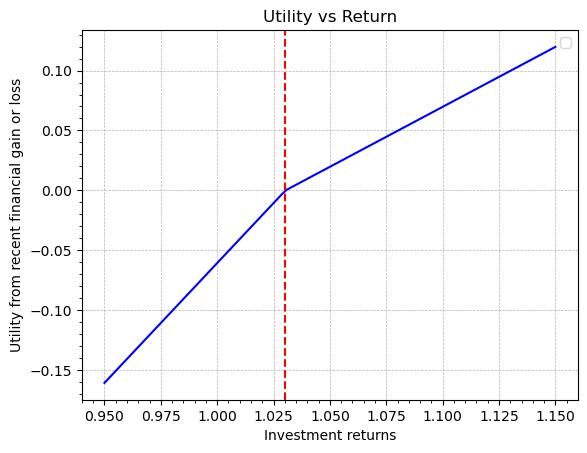

In [24]:
r = np.linspace(0.95, 1.15, 100)
u = [utility(i, R_f) for i in r]
f0, ax0 = plt.subplots(1)

ax0.plot(r, u, color="blue")
ax0.axvline(x=R_f, color="red", linestyle="dashed")
ax0.xaxis.set_major_locator(ticker.AutoLocator())
ax0.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.yaxis.set_major_locator(ticker.AutoLocator())
ax0.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax0.set_xlabel(r"Investment returns")
ax0.set_ylabel(r"Utility from recent financial gain or loss")
ax0.grid(linestyle="--", linewidth=0.5)
ax0.legend()
ax0.set_title(r"Utility vs Return")
plt.show(f0)
f0.savefig("f1.jpg")